In [2]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import math


from pyvrp import Model, Solution
from pyvrp.plotting import plot_coordinates, plot_solution
from pyvrp.stop import MaxRuntime

In [ ]:
COORDS = [
    (456, 320),  # location 0 - the depot
    (228, 0),    # location 1
    (912, 0),    # location 2
    (0, 80),     # location 3
    (67, 24),    # location 4
    (234, 145),  # location 5
    (113, 221),  # location 6
    (380, 200)   # location 7
    ]
DEMANDS = [
    (0, 0),   
    (1, 0),   
    (2, 0),   
    (2, 0),   
    (6, 0),   
    (4, 0),   
    (11, 0),  
    (3, 0),   
]




In [4]:

TIME_WINDOWS = [
        (8, 18),  # location 0 - the depot (modified to be unrestricted)
        (8, 12),   # location 1
        (12, 14),  # location 2
        (14, 16),  # location 3
        (8, 18),   # location 4
        (10, 12),  # location 5
        (12, 14),  # location 6
        (14, 16)   # location 7
]



In [5]:
Number_of_vehicles = 2 #T: NUMBER OF DAYS
Vehicle_capacity = 20  #Q: HOURS AVAILABLE PER DAY
service_time = [0,1,1,1,1,1,1,1]       #TV : VISITING TIME
vehicle_speed = 200    #


In [10]:
m = Model()
m.add_vehicle_type(
    Number_of_vehicles,
    capacity=Vehicle_capacity,
    #tw_early=TIME_WINDOWS[0][0],
    #tw_late=TIME_WINDOWS[0][1],
)

depot = m.add_depot(x=COORDS[0][0], y=COORDS[0][1])
clients = [
    m.add_client(
        x=COORDS[idx][0],
        y=COORDS[idx][1],
        delivery=DEMANDS[idx][0],
        #pickup=DEMANDS[idx][1],
        service_duration=service_time[idx],
        #tw_early=TIME_WINDOWS[idx][0],
        #tw_late=TIME_WINDOWS[idx][1],
    )
    for idx in range(1, len(COORDS))
]

locations = [depot] + clients
DURATION_MATRIX = [[0] * len(locations) for _ in range(len(locations))]  # Initialize duration matrix
distance_matrix = [[0] * len(locations) for _ in range(len(locations))]  # Initialize distance matrix

for frm_idx, frm in enumerate(locations):
    for to_idx, to in enumerate(locations):
        if frm_idx == to_idx:  # No travel cost for the same location
            continue

        # Compute Euclidean distance
        distance = round(math.sqrt((frm.x - to.x) ** 2 + (frm.y - to.y) ** 2))
        
        # Compute duration (integer value of distance)
        duration = int(distance)/vehicle_speed  # Equivalent to 1 min per unit distance at 60 km/h
        
        # Store values in matrices
        DURATION_MATRIX[frm_idx][to_idx] = duration
        distance_matrix[frm_idx][to_idx] = distance

        # Add edge with distance and duration attributes
        m.add_edge(frm, to, distance=1000/duration, duration=duration)


d = distance_matrix[0][1:]


In [11]:
print(d)
print(DURATION_MATRIX)
print(distance_matrix)

[393, 557, 515, 489, 283, 357, 142]
[[0, 1.965, 2.785, 2.575, 2.445, 1.415, 1.785, 0.71], [1.965, 0, 3.42, 1.21, 0.815, 0.725, 1.245, 1.255], [2.785, 3.42, 0, 4.58, 4.225, 3.465, 4.145, 2.84], [2.575, 1.21, 4.58, 0, 0.435, 1.215, 0.905, 1.99], [2.445, 0.815, 4.225, 0.435, 0, 1.03, 1.01, 1.795], [1.415, 0.725, 3.465, 1.215, 1.03, 0, 0.715, 0.78], [1.785, 1.245, 4.145, 0.905, 1.01, 0.715, 0, 1.34], [0.71, 1.255, 2.84, 1.99, 1.795, 0.78, 1.34, 0]]
[[0, 393, 557, 515, 489, 283, 357, 142], [393, 0, 684, 242, 163, 145, 249, 251], [557, 684, 0, 916, 845, 693, 829, 568], [515, 242, 916, 0, 87, 243, 181, 398], [489, 163, 845, 87, 0, 206, 202, 359], [283, 145, 693, 243, 206, 0, 143, 156], [357, 249, 829, 181, 202, 143, 0, 268], [142, 251, 568, 398, 359, 156, 268, 0]]


In [12]:
res = m.solve(stop=MaxRuntime(5), display=True) 
print(res)

PyVRP v0.10.1

Solving an instance with:
    1 depot
    7 clients
    2 vehicles (1 vehicle type)

                  |       Feasible        |      Infeasible
    Iters    Time |   #      Avg     Best |   #      Avg     Best
H     500      0s |  29     5681     4401 |  45     4722     4481
     1000      1s |  41     5306     4401 |  41     4746     4481
     1500      1s |  34     5492     4401 |  56     4675     4481
     2000      2s |  37     5404     4401 |  61     4659     4481
     2500      2s |  47     5194     4401 |  59     4665     4481
     3000      2s |  56     5064     4401 |  58     4668     4481
     3500      3s |  25     5885     4401 |  56     4675     4481
     4000      3s |  65     4977     4401 |  65     4648     4481
     4500      4s |  31     5598     4401 |  25     4916     4481
     5000      4s |  47     5191     4401 |  58     4668     4481
     5500      5s |  60     5019     4401 |  53     4686     4481
     6000      5s |  62     5002     4401 |  59 

In [16]:
Solution_ = res.best
Routes_ = Solution_.routes()
ObjVal = res.cost()/1000

print(Solution_)
print(Routes_[1].visits())
print(ObjVal)

Route #1: 3 7 4 
Route #2: 5 2 6 1 

[5, 2, 6, 1]
4.401


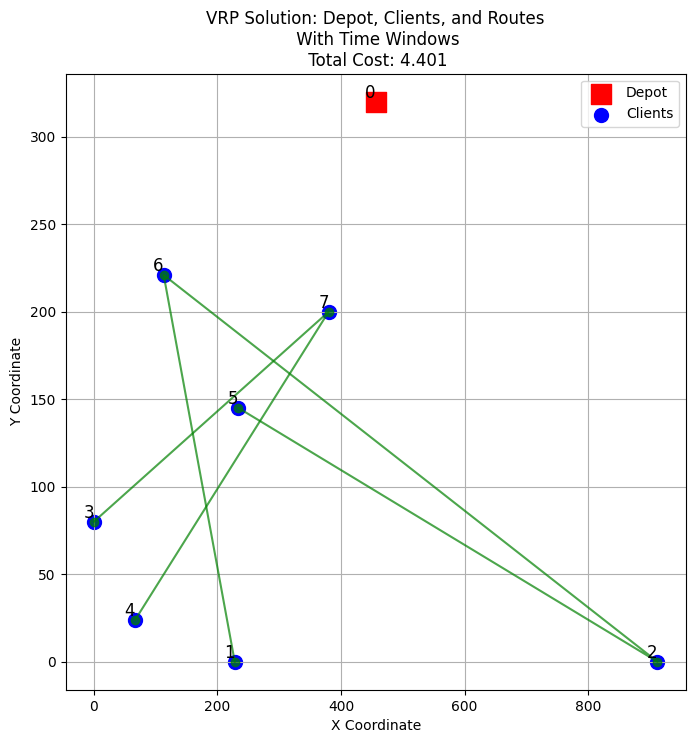

In [17]:
# Extract coordinates
x_coords, y_coords = zip(*COORDS)

# Plot depot and clients
plt.figure(figsize=(8, 8))
plt.scatter(x_coords[0], y_coords[0], c='red', marker='s', s=200, label="Depot")  # Depot in red square
plt.scatter(x_coords[1:], y_coords[1:], c='blue', marker='o', s=100, label="Clients")  # Clients in blue circles

# Annotate points with their index
for idx, (x, y) in enumerate(COORDS):
    plt.text(x, y, str(idx), fontsize=12, ha='right', va='bottom', color="black")

# Plot routes
for route in Routes_:
    route_coords = [COORDS[loc] for loc in route]
    x_route, y_route = zip(*route_coords)
    plt.plot(x_route, y_route, linestyle='-', marker='o', color='green', alpha=0.7)

plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.title(f"VRP Solution: Depot, Clients, and Routes\n With Time Windows\n Total Cost: {Cost_}")
plt.grid(True)
plt.show()
